# Car Value Predictor: Modelado Predictivo de Precios de Vehículos mediante Algoritmos de Regresión para la Empresa Rusty Bargain.

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Análisis exploratorio de datos](#data_review)
    * [Inicialización](#initialization)
    * [Cargar datos](#upload_data)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
    * [Datos Duplicados](#duplicated_data)
    * [Datos Ausentes](#missing_data)
    * [Análisis Estadístico](#statistical_analysis)
* [Etapa 3. Segmentación de conjuntos de datos](#split_data)
* [Etapa 4. Estandarización de los datos](#scaling_data)
* [Etapa 5. Codificación de los datos](#encoding_data)
* [Etapa 6. Entrenamiento y Evaluación de modelos](#models_training_evaluation)
* [Etapa 7. Análisis de los modelos](#models_analysis)
* [Conclusión general](#end)

# Introducción<a id='intro'></a>

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

# Etapa 1. Análisis exploratorio de datos<a id='data_review'></a>

## Inicialización<a id='initialization'></a>

In [36]:
#Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

[Volver a Contenidos](#back)

## Cargar datos<a id='upload_data'></a>

In [37]:
df_car_data = pd.read_csv("./datasets/car_data.csv")
df_car_data

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [38]:
df_car_data.info()
print("\nDatos Duplicados: ", df_car_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

### Conclusiones

Al estudiar los datos del df podemos ver que se trata de 16 columnas (fecha en la que se descargo el perfil, precio, tipo de vehiculo, año de matriculacion del vehiculo, tipo de caja de cambio, potencia, modelo del vehiculo, kilometraje, mes de matriculacion del vehiculo, tipo de combustible, marca del vehiculo, vehiculo con o sin reparacion, fecha de creacion del perfil, numero de fotos del vehiculo, codigo postal del propietario y fecha de la ultima vez que el usuario estuvo activo). 

Teniendo mas de 354,000 filas, ese decir 354,000 registros, vemos que presenta datos ausentes en varias columnas, y los tipos de datos de cada columna están correctos a excepcion de las fechas aunque debido a que no son relevantes para los modelos por lo tanto no las convertiremos a datetime. De igual forma también vemos que presenta 252 registros duplicados los cuales trataremos, y los nombres de las columnas podemos convertir los nombres de las columnas en minuscula y con guion bajo en caso de que sea mas de una palabra.

[Volver a Contenidos](#back)

# Etapa 2. Preprocesamiento de datos<a id='data_preprocessing'></a>

En esta etapa se plantea preprocesar todos los datos del df, como convertir en minuscula los nombres de las columnas, rellenar ciertos valores ausentes y tratar con la duplicidad de los datos.

In [39]:
df_car_data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Mileage', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [40]:
#Creamos una funcion para la conversion a minuscula de todos los nombres de las columnas
def clean_data_columns(data):
    clean_columns = []
    for column in data.columns:
        name_lowered = column.lower()
        clean_columns.append(name_lowered)
    return clean_columns

df_car_data.columns = clean_data_columns(df_car_data)
df_car_data.columns

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'mileage', 'registrationmonth', 'fueltype', 'brand',
       'notrepaired', 'datecreated', 'numberofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [41]:
#Mediante un diccionario renombramos con guion bajo aquellas columnas que tengan mas de una palabra
df_car_data = df_car_data.rename(columns={'datecrawled': 'date_crawled', 'vehicletype': 'vehicle_type', 'registrationyear': 'registration_year', 'registrationmonth': 'registration_month', 'fueltype': 'fuel_type', 'notrepaired': 'not_repaired', 'datecreated': 'date_created', 'numberofpictures': 'number_of_pictures', 'postalcode': 'postal_code', 'lastseen': 'last_seen'})
df_car_data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [42]:
df_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   mileage             354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  not_repaired        283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

## Datos Duplicados<a id='duplicated_data'></a>

In [43]:
#Eliminamos directamente los registros duplicados
df_car_data = df_car_data.drop_duplicates().reset_index(drop=True)

In [44]:
df_car_data.duplicated().sum()

np.int64(0)

## Datos Ausentes<a id='missing_data'></a>

In [45]:
#Detectamos los valores ausentes en las columnas
df_car_data.isna().sum()

date_crawled              0
price                     0
vehicle_type          37484
registration_year         0
gearbox               19830
power                     0
model                 19701
mileage                   0
registration_month        0
fuel_type             32889
brand                     0
not_repaired          71145
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [46]:
#Obtenemos el porcentaje de valores ausentes en nuestro df
vehicle_type_null = 100*(df_car_data['vehicle_type'].isna().sum() / df_car_data.shape[0])
gearbox_null      = 100*(df_car_data['gearbox'].isna().sum() / df_car_data.shape[0])
model_null        = 100*(df_car_data['model'].isna().sum() / df_car_data.shape[0])
fuel_type_null    = 100*(df_car_data['fuel_type'].isna().sum() / df_car_data.shape[0])
not_repaired_null = 100*(df_car_data['not_repaired'].isna().sum() / df_car_data.shape[0])

print(f'Porcentaje de nulos en vehicle_type:  {vehicle_type_null} %')
print(f'Porcentaje de nulos en gearbox:       {gearbox_null} %')
print(f'Porcentaje de nulos en model:         {model_null} %')
print(f'Porcentaje de nulos en fuel_type:     {fuel_type_null} %')
print(f'Porcentaje de nulos en not_repaired:  {not_repaired_null} %')

Porcentaje de nulos en vehicle_type:  10.585500992637819 %
Porcentaje de nulos en gearbox:       5.600002259204139 %
Porcentaje de nulos en model:         5.56357259246499 %
Porcentaje de nulos en fuel_type:     9.287870615378967 %
Porcentaje de nulos en not_repaired:  20.09138480741697 %


Observamos que los porcentajes de los valores ausentes son bajos, siendo el mayor en la columna not_repaired y el menor en la columna model. Por lo tanto, debido a que se desconocen estos datos los rellenaremos con el valor 'unknown'

In [47]:
#Mediante un ciclo, rellenamos los valores de las columnas con datos ausentes que estan en la lista por el valor unknown
nulls = ['vehicle_type','gearbox', 'model', 'fuel_type', 'not_repaired']

for col in nulls:
    df_car_data[col] = df_car_data[col].fillna('unknown')

In [48]:
df_car_data.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

### Conclusiones

Como podemos observar en esta primera parte del preprocesamiento, logramos eliminar los registros duplicados y con respecto a los datos ausentes debido a que estaban presentes solo en columnas categoricas se rellenaron con el valor 'unknown'.

[Volver a Contenidos](#back)

## Análisis Estadístico

Ahora al observar las variables numericas, vemos que hay ciertas irregularidades con los valores de las columnas price, registration_year y power.

In [49]:
df_car_data.describe()

,price,registration_year,power,mileage,registration_month,number_of_pictures,postal_code
count,354107.000000,354107.000000,354107.000000,354107.000000,354107.000000,354107.0,354107.000000
mean,4416.433287,2004.235355,110.089651,128211.811684,5.714182,0.0,50507.145030
std,4514.338584,90.261168,189.914972,37906.590101,3.726682,0.0,25784.212094
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49406.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


### Price

In [50]:
df_car_data['price'].value_counts().reset_index()

,price,count
0,0,10770
1,500,5667
2,1500,5391
3,1000,4647
4,1200,4589
...,...,...
3726,1294,1
3727,2511,1
3728,5775,1
3729,7428,1


In [51]:
df_car_data[df_car_data['price'] < 500]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,24/03/2016 11:52,480,unknown,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,24/03/2016 00:00,0,70435,07/04/2016 03:16
7,21/03/2016 18:54,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21/03/2016 00:00,0,19348,25/03/2016 16:47
15,11/03/2016 21:39,450,small,1910,unknown,0,ka,5000,0,petrol,ford,unknown,11/03/2016 00:00,0,24148,19/03/2016 08:46
16,01/04/2016 12:46,300,unknown,2016,unknown,60,polo,150000,0,petrol,volkswagen,unknown,01/04/2016 00:00,0,38871,01/04/2016 12:46
23,12/03/2016 19:43,450,small,1997,manual,50,arosa,150000,5,petrol,seat,no,12/03/2016 00:00,0,9526,21/03/2016 01:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354056,15/03/2016 19:57,400,wagon,1991,manual,0,legacy,150000,0,petrol,subaru,unknown,15/03/2016 00:00,0,24558,19/03/2016 15:49
354067,30/03/2016 20:55,350,small,1996,unknown,65,punto,150000,0,unknown,fiat,unknown,30/03/2016 00:00,0,25436,07/04/2016 13:50
354073,04/04/2016 14:41,390,small,1997,auto,0,corsa,100000,6,petrol,opel,yes,04/04/2016 00:00,0,17509,06/04/2016 15:46
354076,31/03/2016 19:52,180,unknown,1995,unknown,0,unknown,125000,3,petrol,opel,unknown,31/03/2016 00:00,0,41470,06/04/2016 14:18


Observamos que mas de 36 mil autos poseen un precio menor de 500 euros, lo cual esto no pude ser posible.

In [52]:
df_price_filter = df_car_data[df_car_data['price'] >= 500]
print("Total de valores atípicos:", df_car_data.shape[0] - df_price_filter['price'].count())
print("Distribución de valores atípicos:", 36046/len(df_car_data)*100,'%')

Total de valores atípicos: 36046
Distribución de valores atípicos: 10.179409048677378 %


Debido a que existen registros con precios de vehículos menores a 500 euros, y ademas que solo representan el 10%, es poco probable que representen vehículos reales en venta. Estos valores atípicos pueden deberse a errores de ingreso, pruebas o vehículos dados de baja, por lo tanto procederemos a eliminar estos valores para que no afecten al entrenamiento de los modelos.

In [53]:
df_car_data = df_car_data[df_car_data['price'] >= 500].reset_index(drop=True)

Validamos los cambios.

In [54]:
print(df_car_data['price'].value_counts())

price
500      5667
1500     5391
1000     4647
1200     4589
2500     4438
         ... 
4159        1
7085        1
12360       1
10190       1
8146        1
Name: count, Length: 3467, dtype: int64


In [55]:
print("Precio mínimo:", df_car_data['price'].min())

Precio mínimo: 500


In [56]:
outliers_count = (df_car_data['price'] < 500).sum()
print("Registros con price < 500:", outliers_count)

Registros con price < 500: 0


[Volver a Contenidos](#back)

### Registration year

En el caso de la columna de año de matriculacion del vehículo, podemos observar dos cosas:

* La primera es que encontramos valores de año mayores a 2025, o en este caso 2019 ya que tras este año el siguiente es 2066

* La segunda es que encontramos valores de año menores a 1910, ya que el año anterior a este es 1800, 1910 se considerara aun como un año donde existe la comercializacion de vehiculos y los demas anteriores no debido a que ni siquiera existian vehiculos.

In [57]:
df_car_data['registration_year'].sort_values(ascending=True).unique()

array([1000, 1001, 1039, 1234, 1400, 1500, 1600, 1602, 1800, 1910, 1923,
       1925, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2066, 2290, 2500, 2800, 2900, 3000,
       3200, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555, 5911,
       6000, 7000, 7100, 7800, 8200, 8500, 8888, 9000, 9450, 9999])

In [58]:
df_car_data[df_car_data['registration_year'] > 2025].count()

date_crawled          56
price                 56
vehicle_type          56
registration_year     56
gearbox               56
power                 56
model                 56
mileage               56
registration_month    56
fuel_type             56
brand                 56
not_repaired          56
date_created          56
number_of_pictures    56
postal_code           56
last_seen             56
dtype: int64

In [59]:
df_car_data[df_car_data['registration_year'] < 1910].count()

date_crawled          24
price                 24
vehicle_type          24
registration_year     24
gearbox               24
power                 24
model                 24
mileage               24
registration_month    24
fuel_type             24
brand                 24
not_repaired          24
date_created          24
number_of_pictures    24
postal_code           24
last_seen             24
dtype: int64

Conservamos únicamente los vehículos con año de registro entre 1910 y 2025, eliminando así valores atípicos como registros de vehículos con fechas imposibles por ejemplo: 999 o 3000, que pueden surgir por errores humanos o de sistema.

In [60]:
#Filtramos los registros para conservar solo los vehículos registrados entre 1910 y 2025.
df_car_data = df_car_data[(df_car_data['registration_year'] >= 1910) & (df_car_data['registration_year'] <= 2025)].reset_index(drop=True)

[Volver a Contenidos](#back)

### Power

En el caso de la columna power encontramos valores desde 0 a 20000, debido a que power o potencia se mide en CV (Caballos de Vapor) vemos que hay potencias mayores a 2000 y menores a 60 significando vehiculos muy poco probables o imposibles. 

In [61]:
df_car_data['power'].sort_values(ascending=True).unique()

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99,   100,   101,   102,   103,   104,   105,   106,   107,
         108,   109,   110,   111,   112,   113,   114,   115,   116,
         117,   118,   119,   120,   121,   122,   123,   124,   125,
         126,   127,

In [62]:
# Visualizamos los datos de la columna
print(df_car_data['power'].value_counts())

power
0       28610
75      20761
150     13836
60      12675
140     12577
        ...  
7518        1
377         1
2007        1
2598        1
1548        1
Name: count, Length: 668, dtype: int64


Conservamos los vehículos cuya potencia se encuentra entre 60 y 2000, eliminando valores extremos o poco probables como registros de vehículos con potencias imposibles por ejemplo: 0 o 20000, que pueden surgir por errores humanos o de sistema.

In [63]:
# Filtramos los registros para conservar únicamente vehículos con potencia entre 60 y 2000.
df_car_data = df_car_data[(df_car_data['power'] >= 60) & (df_car_data['power'] <= 2000)].reset_index(drop=True)

Validamos los cambios.

In [64]:
df_car_data['power'].sort_values(ascending=True).unique()

array([  60,   61,   62,   63,   64,   65,   66,   67,   68,   69,   70,
         71,   72,   73,   74,   75,   76,   77,   78,   79,   80,   81,
         82,   83,   84,   85,   86,   87,   88,   89,   90,   91,   92,
         93,   94,   95,   96,   97,   98,   99,  100,  101,  102,  103,
        104,  105,  106,  107,  108,  109,  110,  111,  112,  113,  114,
        115,  116,  117,  118,  119,  120,  121,  122,  123,  124,  125,
        126,  127,  128,  129,  130,  131,  132,  133,  134,  135,  136,
        137,  138,  139,  140,  141,  142,  143,  144,  145,  146,  147,
        148,  149,  150,  151,  152,  153,  154,  155,  156,  157,  158,
        159,  160,  161,  162,  163,  164,  165,  166,  167,  168,  169,
        170,  171,  172,  173,  174,  175,  176,  177,  178,  179,  180,
        181,  182,  183,  184,  185,  186,  187,  188,  189,  190,  191,
        192,  193,  194,  195,  196,  197,  198,  199,  200,  201,  202,
        203,  204,  205,  206,  207,  208,  209,  2

[Volver a Contenidos](#back)

### Registration_Month

En el caso de la columna de mes de matriculacion del vehiculo, vemos que hay valores 0 siendo imposible debido a que los meses estan dl 1 al 12, por lo tanto trataremos esos valores 0.

In [65]:
df_car_data['registration_month'].value_counts()

registration_month
3     27871
6     25515
4     23661
5     23580
7     22014
10    21205
11    19580
12    19574
9     19419
1     18300
8     18236
2     17157
0     14806
Name: count, dtype: int64

In [66]:
df_car_data[df_car_data['registration_month'] == 0]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
7,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,unknown,volkswagen,unknown,17/03/2016 00:00,0,27472,31/03/2016 17:17
28,11/03/2016 11:50,1600,other,1991,manual,75,kadett,70000,0,unknown,opel,unknown,11/03/2016 00:00,0,2943,07/04/2016 03:46
99,27/03/2016 20:51,1450,sedan,1992,manual,136,unknown,150000,0,unknown,audi,no,27/03/2016 00:00,0,38709,05/04/2016 20:17
105,14/03/2016 12:46,1500,wagon,1996,manual,126,a4,150000,0,unknown,audi,no,14/03/2016 00:00,0,24873,17/03/2016 00:45
118,04/04/2016 12:57,1200,unknown,2018,manual,75,astra,150000,0,unknown,opel,no,04/04/2016 00:00,0,15344,06/04/2016 14:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270799,03/04/2016 14:56,1700,sedan,1997,manual,101,a4,150000,0,petrol,audi,yes,03/04/2016 00:00,0,16515,03/04/2016 14:56
270818,19/03/2016 01:47,5000,sedan,2002,auto,170,unknown,150000,0,petrol,audi,no,18/03/2016 00:00,0,85221,06/04/2016 03:45
270827,07/03/2016 16:37,560,small,2001,auto,170,unknown,90000,0,petrol,fiat,yes,07/03/2016 00:00,0,55743,12/03/2016 21:45
270888,31/03/2016 19:36,1300,small,1999,manual,75,2_reihe,125000,0,unknown,peugeot,unknown,31/03/2016 00:00,0,35102,06/04/2016 13:44


Al ver que se tratan de mas del 14 mil registros que poseen valor 0, los reemplazaremos con la mediana que en este caso seria 6

In [67]:
# Reemplazamos los valores 0 de la columna registration_month con el valor 6 que vendria siendo la mediana
df_car_data['registration_month'] = df_car_data['registration_month'].replace(0, 6)

Validamos los cambios.

In [68]:
df_car_data['registration_month'].value_counts()

registration_month
6     40321
3     27871
4     23661
5     23580
7     22014
10    21205
11    19580
12    19574
9     19419
1     18300
8     18236
2     17157
Name: count, dtype: int64

In [69]:
df_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270918 entries, 0 to 270917
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        270918 non-null  object
 1   price               270918 non-null  int64 
 2   vehicle_type        270918 non-null  object
 3   registration_year   270918 non-null  int64 
 4   gearbox             270918 non-null  object
 5   power               270918 non-null  int64 
 6   model               270918 non-null  object
 7   mileage             270918 non-null  int64 
 8   registration_month  270918 non-null  int64 
 9   fuel_type           270918 non-null  object
 10  brand               270918 non-null  object
 11  not_repaired        270918 non-null  object
 12  date_created        270918 non-null  object
 13  number_of_pictures  270918 non-null  int64 
 14  postal_code         270918 non-null  int64 
 15  last_seen           270918 non-null  object
dtypes:

### Conclusiones

Como podemos observar en esta segunda parte del preprocesamiento de los datos, mediante un analisis estadistico pudimos notar ciertas irregularidades en ciertos valores de las columnas price, registration_year, power y registration_month. Como por ejemplo valor muy bajos o altos en power, años imposibles del pasado y que aun no han sucedido, valores 0 en las columnas de registration_month y valores de precio menores a 500 euros.

Los cuales tratamos en su mayoria con eliminar esos datos y realizar solo imputacion de la mediana unicamente en la columna de registration_month, debido a que realizar imputaciones en las demas columnas podria afectar el entrenamiento de los modelos, sobretodo con respecto con la columna price ya que se trata de la columna objetivo.

[Volver a Contenidos](#back)

In [70]:
df_car_data.describe()

,price,registration_year,power,mileage,registration_month,number_of_pictures,postal_code
count,270918.000000,270918.000000,270918.000000,270918.00000,270918.000000,270918.0,270918.000000
mean,5304.233000,2003.830513,128.291284,128149.75380,6.377472,0.0,51564.770920
std,4623.724385,6.579923,61.919557,36800.60549,3.252319,0.0,25781.090747
min,500.000000,1910.000000,60.000000,5000.00000,1.000000,0.0,1067.000000
25%,1700.000000,2000.000000,90.000000,125000.00000,4.000000,0.0,31171.000000
50%,3700.000000,2004.000000,116.000000,150000.00000,6.000000,0.0,50769.000000
75%,7500.000000,2008.000000,150.000000,150000.00000,9.000000,0.0,72379.000000
max,20000.000000,2019.000000,2000.000000,150000.00000,12.000000,0.0,99998.000000


In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_car_data['price'], bins=50, kde=True)
plt.title('Distribución de Precios de Autos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Etapa 3. Segmentación de conjuntos de datos<a id='split_data'></a>

Ya que hemos realizado el preprocesamiento de nuestros datos, realizamos una copia del df limpio con el que trabajaremos a partir de ahora.

In [71]:
# Realizamos una copia del df limpio
df = df_car_data.copy()

# Desechamos las columnas que no son relevantes para el entrenamiento de modelos
df = df.drop(['date_crawled', 'date_created', 'last_seen', 'number_of_pictures', 'postal_code'], axis=1)

In [72]:
# Seleccionamos y observamos nuestras variables categóricas
category_col = df.select_dtypes(include='object')
category_col

,vehicle_type,gearbox,model,fuel_type,brand,not_repaired
0,coupe,manual,unknown,gasoline,audi,yes
1,suv,auto,grand,gasoline,jeep,unknown
2,small,manual,golf,petrol,volkswagen,no
3,small,manual,fabia,gasoline,skoda,no
4,sedan,manual,3er,petrol,bmw,yes
...,...,...,...,...,...,...
270913,unknown,auto,159,unknown,alfa_romeo,no
270914,sedan,manual,leon,petrol,seat,yes
270915,convertible,auto,fortwo,petrol,smart,no
270916,bus,manual,transporter,gasoline,volkswagen,no


In [73]:
# Seleccionamos y observamos nuestras variables numericas
numeric_col = df.select_dtypes(include='int')
numeric_col

,price,registration_year,power,mileage,registration_month
0,18300,2011,190,125000,5
1,9800,2004,163,125000,8
2,1500,2001,75,150000,6
3,3600,2008,69,90000,7
4,650,1995,102,150000,10
...,...,...,...,...,...
270913,5250,2016,150,150000,12
270914,3200,2004,225,150000,5
270915,1199,2000,101,125000,3
270916,9200,1996,102,150000,3


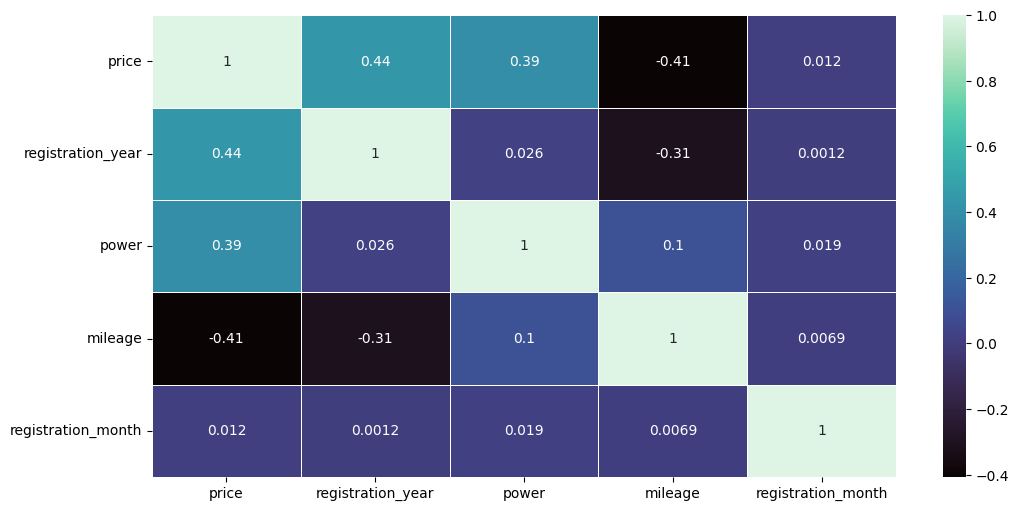

In [74]:
# Mediante una matríz de correlación visualizamos la correlacion de las columnas numericas con la columna objetivo
plt.figure(figsize=(12,6))
sns.heatmap(numeric_col.corr(), annot=True, cmap='mako', linewidth=0.5)
plt.show()

Observamos la correlacion de las variables numericas con la columna objetivo que es price, y vemos como registration_year es la columna con el mayor valor de correlacion con price y de igual manera vemos que la columna de kilometraje tiene una correlacion negativa significando que a menor kilometraje tenga el vehiculo entonces tendra un mayor precio.

In [75]:
# Definimos las caracteristicas y el objetivo
features = df.drop(columns='price')
target = df['price']

In [76]:
# Separamos los datos en conjuntos de entrenamiento y prueba
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [77]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(203188, 10)
(203188,)
(67730, 10)
(67730,)


### Conclusiones

Podemos observar como mediante la function train_test_split es posible dividir los datos en primera instancia un 75% de entrenamiento y un 25% de prueba, obteniendo como caracteristicas 203,188 filas y 10 columnas, y de objetivo una sola columna con 67,730 filas. 

[Volver a Contenidos](#back)

# Etapa 4. Estandarización de los datos<a id='scaling_data'></a>

In [78]:
# Creamos una funcion para escalar las caracteristicas, la cual tendra como parametros las caracteristicas de entrenamiento y prueba
def scaling_df(features_train, features_test):
    
    #Creamos una lista de las columnas para el escalado
    numeric_cols = ['registration_year', 'power', 'mileage', 'registration_month']
    
    #Creamos una instancia del StandardScaler
    scaler = StandardScaler()
    
    #Realizamos una copia de los datos de caracteristicas y los alamcenamos como nuevas variables
    features_train_scaled = features_train.copy()
    features_test_scaled = features_test.copy()
    
    #Escalamos los datos con las caracteristicas de entrenamiento y transformamos los conjuntos de entrenamiento y de pruebas
    scaler.fit(features_train_scaled[numeric_cols])
    
    features_train_scaled[numeric_cols] = scaler.transform(features_train[numeric_cols])
    features_test_scaled[numeric_cols] = scaler.transform(features_test[numeric_cols])
    
    return features_train_scaled, features_test_scaled

In [79]:
# Llamamos la funcion para escalar los datos pasandole como argumentos las caracteristicas de entrenamiento y prueba
# Y lo que retorne lo almacenamos en nuevas variables
features_train_scaled, features_test_scaled = scaling_df(features_train, features_test)

# Reseteamos los targets de entrenamiento y prueba
target_train = target_train.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

### Conclusiones

Como podemos observar por medio de una funcion pudimos escalar las variables numéricas del conjunto de datos utilizando StandardScaler, lo cual es esencial para los modelos sensibles a la escala como la regresión lineal y asi garantizar que no se vean influenciados por las diferencias de magnitud entre las variables.

[Volver a Contenidos](#back)

# Etapa 5. Codificación de los datos<a id='encoding_data'></a>

In [80]:
# Creamos una funcion para codificar las caracteristicas categoricas, la cual recibira como parametros las caracteristicas de entrenamiento, prueba y las columnas categoricas
def apply_ohe(train_df, test_df, categorical_cols):
    
    # Aplicamos One-Hot Encoding(OHE) al conjunto de entrenamiento y prueba sobre las columnas categóricas.
    # Usamos drop_first=True para evitar multicolinealidad, y dtype='int' para mantener el tipo de dato consistente.
    train_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True, dtype='int')
    test_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True, dtype='int')
    
    # Agregamos cualquier columna en caso de que este en el conjunto de entrenamiento pero falte en el de prueba
    # Asignamos el valor 0. Esto asegura que ambos datasets tengan el mismo número de columnas.
    for col in train_encoded.columns:
        if col not in test_encoded.columns:
            test_encoded[col] = 0
    
    # Reordenamos las columnas del conjunto de prueba para que coincidan con el orden del conjunto de entrenamiento.
    test_encoded = test_encoded[train_encoded.columns]
    
    return train_encoded, test_encoded

In [81]:
category_col = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

# Llamamos la funcion para aplicar la codificacion One-Hot Encoding(OHE) a los datos pasandole como argumentos las caracteristicas de entrenamiento y prueba(previamente escaladas) y las columnas categoricas
# Y lo que retorne lo almacenamos en nuevas variables
features_train_scaled_ohe, features_test_scaled_ohe = apply_ohe(features_train_scaled, features_test_scaled, category_col)

### Conclusiones

Como podemos observar por medio de una funcion pudimos aplicar la codificación OHE a las variables categóricas tanto del conjunto de entrenamiento como del conjunto de prueba. Debido a que esto permite que los modelos como regresión lineal y XGBoost puedan interpretar variables no numéricas.

[Volver a Contenidos](#back)

# Etapa 6. Entrenamiento y Evaluación de modelos<a id='models_training_evaluation'></a>

## Regresión Lineal

In [82]:
# Creamos una clase personalizada acerca de un modelo de regresion lineal utilizando el descenso del gradiente
class MyLinearRegression:
    # Inicializamos los hiperparametros del modelo como la tasa de aprendizaje del descenso del gradiente(learning_rate) y el numero de iteraciones para actualizar los parametros(n_iters)
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    # Entrenamos el modelo utilizando el algoritmo de descenso del gradiente, siendo "X" las caracteristicas y "y" el objetivo
    def fit(self, X, y):
        # Inicialización de los coeficientes y del sesgo
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Descenso del Gradiente
        for _ in range(self.n_iters):
            # Predicciones actuales
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculamos los gradiantes(derivadas), siendo los gradientes respecto a los pesos y al sesgo
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Actualizamos los parametros
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    # Realizamos predicciones usando el modelo entrenado, el cual retorna el vector de predicciones en donde "X" es el conjunto de caracteristicas para predecir
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [83]:
#Creamos una funcion para evaluar el modelo
def eval_regressor(y_test, y_pred):
    #Calculamos la raiz del error cuadratico medio 
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    print(f'\nRMSE: {rmse:.2f}')
    
    #Calculamos el r2 score
    r2_score_model = r2_score(y_test, y_pred)
    print(f'R2: {r2_score_model:.2f}')
    
    return rmse, r2_score_model

In [84]:
# Entrenamiento del modelo de regresión
start_train = time.time()
model_linear_reg = MyLinearRegression()
model_linear_reg.fit(features_train_scaled_ohe, target_train)
end_train = time.time()

# Calculamos las Predicciones
start_test = time.time()
linear_reg_predictions = model_linear_reg.predict(features_test_scaled_ohe)
end_test = time.time()

train_lr_time = end_train - start_train
pred_lr_time = end_test - start_test

# Establecemos el RMSE y R2 score para nuestra prueba de cordura
lr_rmse, lr_r2_score = eval_regressor(target_test, linear_reg_predictions)
print(f'Tiempo de Entrenamiento: {train_lr_time:.3f} seg')
print(f'Tiempo de Predicción: {pred_lr_time:.9f} seg')


RMSE: 3020.16
R2: 0.57
Tiempo de Entrenamiento: 511.987 seg
Tiempo de Predicción: 0.239598274 seg


## Random Forest: Ajuste de hiperparámetros con GridSearchCV

In [85]:
# Definimos un diccionario con los hiperparámetros, los cuales son:
# número de árboles en el bosque(n_estimators), profundidad máxima de cada árbol(max_depth) y la aleatoriedad
h_params = {'n_estimators' : [10, 20, 40, 50], 'max_depth' : [1, 2, 3, 4, 5], 'random_state' : [12345]}

# Utilizamos GridSearchCV para realizar una búsqueda de la mejor combinación de hiperparámetros, donde:
# usamos scoring='neg_root_mean_squared_error' para tomar el RMSE como métrica de evaluación y cv=5 para emplear la validación cruzada de 5 particiones.
gridSearch_rf = GridSearchCV(estimator = RandomForestRegressor(), param_grid = h_params, scoring = 'neg_root_mean_squared_error', cv=5)

# Entrenamos el GridSearchCV sobre el conjunto de entrenamiento codificado y escalado.
start_tr = time.time()
gridSearch_rf.fit(features_train_scaled_ohe, target_train)
end_tr = time.time()

param_rf_time = end_tr-start_tr
print(f"Tiempo de ajuste de hiperparámetros Random Forest: {param_rf_time:.3f} seg")

Tiempo de ajuste de hiperparámetros Random Forest: 1455.447 seg


In [86]:
# Obtenemos los mejores hiperparámetros que devolvió el valor más bajo de RMSE
best_set_params = gridSearch_rf.best_params_
print(f"Mejores Hiperparámetros del Modelo: {best_set_params}")

Mejores Hiperparámetros del Modelo: {'max_depth': 5, 'n_estimators': 50, 'random_state': 12345}


In [87]:
# Entrenamos el modelo Random Forest utilizando los mejores hiperparámetros encontrados.
start_tr_rf = time.time()
random_forest_model = RandomForestRegressor(max_depth=5, n_estimators=50, random_state=12345)
random_forest_model.fit(features_train_scaled_ohe, target_train)
end_tr_rf = time.time()

# Calculamos las Predicciones
start_ts_rf = time.time()
random_forest_predictions = random_forest_model.predict(features_test_scaled_ohe)
end_ts_rf = time.time()

train_rf_time = end_tr_rf - start_tr_rf
pred_rf_time = end_ts_rf - start_ts_rf

# Evaluamos el modelo usando RMSE y R2 score
rf_rmse, rf_r2_score = eval_regressor(target_test, random_forest_predictions)
print(f'Tiempo de Entrenamiento: {train_rf_time:.3f} seg')
print(f'Tiempo de Prueba: {pred_rf_time:.3f} seg')


RMSE: 2509.38
R2: 0.71
Tiempo de Entrenamiento: 56.566 seg
Tiempo de Prueba: 0.455 seg


## CatBoost: Ajuste de hiperparámetros con GridSearchCV

In [88]:
# Definimos las Características Categóricas
cat_features = ['vehicle_type','gearbox','model','fuel_type','brand','not_repaired']

# Establecemos los hiperparámetros que vamos ajustar, siendo depth las profundidades del arbol y learning rate como las tasas de aprendizaje
params_catboost = {'depth': [4, 6, 10], 'learning_rate': [0.1, 0.2, 0.5]}

# Creamos una instancia del modelo CatBoostRegressor con el numero de iteraciones, verbose=False para no mostrar la salida detallada 
# e indicamos que la metrica optimizada ser RMSE
catboost_est = CatBoostRegressor(iterations=100, cat_features=cat_features, verbose=False, loss_function='RMSE')

# Utilizamos GridSearchCV para realizar una búsqueda de la mejor combinación de hiperparámetros, donde:
# usamos scoring='neg_root_mean_squared_error' para tomar el RMSE como métrica de evaluación y cv=3 para emplear la validación cruzada de 3 particiones.
gridSearch_catboost = GridSearchCV(estimator=catboost_est, param_grid=params_catboost, scoring='neg_root_mean_squared_error', cv=3)

# Entrenamos el modelo con todas las combinaciones de hiperparámetros definidas y con los datos de entrenamiento
start_gs = time.time()
gridSearch_catboost.fit(features_train, target_train)
end_gs = time.time()

param_cb_time = end_gs-start_gs
print(f'Tiempo de Hiperparámetros del Modelo: {param_cb_time:.3f} seg')

Tiempo de Hiperparámetros del Modelo: 372.926 seg


In [89]:
# Obtenemos los mejores hiperparámetros que devolvió el valor más bajo de RMSE
best_cb_set_params = gridSearch_catboost.best_params_

print(f"Mejores Hiperparámetros del Modelo: {best_cb_set_params}")

Mejores Hiperparámetros del Modelo: {'depth': 10, 'learning_rate': 0.5}


In [90]:
# Entrenamos el modelo CatBoost utilizando los mejores hiperparámetros encontrados.
start_cb = time.time()
catboost_model = CatBoostRegressor(iterations=100, depth=10, learning_rate=0.5, loss_function='RMSE', random_seed=12345)
catboost_model.fit(features_train, target_train, cat_features=cat_features, verbose=False)
end_cb = time.time()

# Calculamos las Predicciones
start_cb_tp = time.time()
catboost_predictions = catboost_model.predict(features_test)
end_cb_tp = time.time()

train_cb_time = end_cb-start_cb
pred_cb_time = end_cb_tp-start_cb_tp

# Evaluamos el modelo usando RMSE y R2 score
cb_rmse, cb_r2_score = eval_regressor(target_test, catboost_predictions)
print(f'Tiempo de Entrenamiento: {train_cb_time:.3f} seg')
print(f'Tiempo de Prueba: {pred_cb_time:.3f} seg')


RMSE: 1623.79
R2: 0.88
Tiempo de Entrenamiento: 20.599 seg
Tiempo de Prueba: 0.180 seg


## Light GBM Regressor: Ajuste de hiperparámetros con GridSearchCV

In [91]:
# Creamos copias de los datasets de entrenamiento y prueba para conservar los originales
features_train_lgbm = features_train.copy()
features_test_lgbm = features_test.copy()

# Convertimos las columnas categóricas al tipo category
for col in cat_features:
    features_train_lgbm[col] = features_train_lgbm[col].astype('category')
    features_test_lgbm[col] = features_test_lgbm[col].astype('category')

In [92]:
# Establecemos los hiperparámetros que vamos ajustar, siendo n_estimators como el número de árboles, learning rate como las tasas de aprendizaje y
# num_leaves como el número de hojas por árbol
params_lightgbm = {'n_estimators' : [200, 500], 'learning_rate': [0.1, 0.2, 0.5], 'num_leaves'   : [10, 20]}

# Instanciamos el modelo base LightGBM Regressor
lightgbm_est = LGBMRegressor()

# Utilizamos GridSearchCV para realizar una búsqueda de la mejor combinación de hiperparámetros, donde:
# usamos scoring='neg_root_mean_squared_error' para tomar el RMSE como métrica de evaluación y cv=3 para emplear la validación cruzada de 3 particiones.
gridSearch_lightgbm = GridSearchCV(estimator = lightgbm_est, param_grid = params_lightgbm, scoring = 'neg_root_mean_squared_error', cv = 3)

# Entrenamos el modelo con todas las combinaciones de hiperparámetros definidas y con los datos de entrenamiento
start_lgbm = time.time()
gridSearch_lightgbm.fit(features_train_lgbm, target_train)
end_lgbm = time.time()

param_lgbm_time = end_lgbm-start_lgbm
print()
print(f'Tiempo de Hiperparámetros del Modelo: {param_lgbm_time:.3f} seg')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 135458, number of used features: 10
[LightGBM] [Info] Start training from score 5304.359063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 135459, number of used features: 10
[LightGBM] [Info] Start training from score 5308.791812
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

In [93]:
# Obtenemos los mejores hiperparámetros que devolvió el valor más bajo de RMSE
best_lgbm_set_params = gridSearch_lightgbm.best_params_
print(f"Mejores Hiperparámetros del Modelo: {best_lgbm_set_params}")

Mejores Hiperparámetros del Modelo: {'learning_rate': 0.2, 'n_estimators': 500, 'num_leaves': 20}


In [94]:
# Entrenamos el modelo LightGBM utilizando los mejores hiperparámetros encontrados.
lightgbm_model   = LGBMRegressor(n_estimators = 500, learning_rate= 0.2, num_leaves = 20,random_seed = 12345)
start_ltr = time.time()
lightgbm_model.fit(features_train_lgbm, target_train)
end_ltr = time.time()

# Calculamos las Predicciones
start_lts = time.time()
lightgbm_predictions = lightgbm_model.predict(features_test_lgbm)
end_lts = time.time()

train_lgbm_time = end_ltr-start_ltr
pred_lgbm_time = end_lts-start_lts

# Evaluamos el modelo usando RMSE y R2 score
lgbm_rmse, lgbm_r2_score = eval_regressor(target_test, lightgbm_predictions)
print(f'Tiempo de Entrenamiento: {train_lgbm_time:.3f} seg')
print(f'Tiempo de Prueba: {pred_lgbm_time:.3f} seg')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 662
[LightGBM] [Info] Number of data points in the train set: 203188, number of used features: 10
[LightGBM] [Info] Start training from score 5305.961011

RMSE: 1579.49
R2: 0.88
Tiempo de Entrenamiento: 1.238 seg
Tiempo de Prueba: 0.224 seg


In [104]:
n = features_test_lgbm.shape[0]  # Number of rows
p = features_test_lgbm.shape[1]  # Number of columns (features)
r2 = r2_score(target_test, lightgbm_predictions)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"Standard R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

Standard R-squared: 0.883169442749892
Adjusted R-squared: 0.8831521904931767


## XGBoost: Ajuste de hiperparámetros con GridSearchCV

In [95]:
# Establecemos los hiperparámetros que vamos ajustar, siendo max_depth que controla la profundidad de cada árbol y n_estimators como el número de árboles
params_xgboost = {'max_depth' : [4, 6, 8], 'n_estimators': [25, 50]}

# Instanciamos el modelo base XGBoost Regressor
xgboost_est = XGBRegressor()

# Utilizamos GridSearchCV para realizar una búsqueda de la mejor combinación de hiperparámetros, donde:
# usamos scoring='neg_root_mean_squared_error' para tomar el RMSE como métrica de evaluación y cv=3 para emplear la validación cruzada de 3 particiones.
gridSearch_xgboost = GridSearchCV(estimator = xgboost_est, param_grid = params_xgboost, scoring = 'neg_root_mean_squared_error', cv = 3)

# Entrenamos el modelo con todas las combinaciones de hiperparámetros definidas y con los datos de entrenamiento ya escalados y codificados
start_xgb = time.time()
gridSearch_xgboost.fit(features_train_scaled_ohe, target_train)
end_xgb = time.time()
param_xgb_time = end_xgb-start_xgb
print(f'Tiempo de Hiperparámetros del Modelo: {param_xgb_time:.3f} seg')

Tiempo de Hiperparámetros del Modelo: 31.967 seg


In [96]:
# Obtenemos los mejores hiperparámetros que devolvió el valor más bajo de RMSE
best_xgb_set_params = gridSearch_xgboost.best_params_
print(f"Mejores Hiperparámetros del Modelo: {best_xgb_set_params}")

Mejores Hiperparámetros del Modelo: {'max_depth': 8, 'n_estimators': 50}


In [97]:
# Entrenamos el modelo XGB utilizando los mejores hiperparámetros encontrados.
xgboost_model = XGBRegressor(n_estimators = 50, max_depth = 8, random_state = 12345)
start_tr_xgb = time.time()
xgboost_model.fit(features_train_scaled_ohe, target_train)
end_tr_xgb = time.time()

# Calculamos las Predicciones
start_ts_xgb = time.time()
xgboost_predictions = xgboost_model.predict(features_test_scaled_ohe)
end_ts_xgb = time.time()

train_xgb_time = end_tr_xgb-start_tr_xgb
pred_xgb_time = end_ts_xgb-start_ts_xgb

# Evaluamos el modelo usando RMSE y R2 score
xgb_rmse, xgb_r2_score = eval_regressor(target_test, xgboost_predictions)
print(f'Tiempo de Entrenamiento: {train_xgb_time:.3f} seg')
print(f'Tiempo de Prueba: {pred_xgb_time:.3f} seg')


RMSE: 1669.21
R2: 0.87
Tiempo de Entrenamiento: 2.036 seg
Tiempo de Prueba: 0.297 seg


### Conclusiones

Tras implementar y comparar diferentes modelos de regresión, se observa que los algoritmos como CatBoost, LightGBM y XGBoost superan significativamente a la regresión lineal y a Random Forest, esto por lo siguientes puntos:

* La regresión lineal presentó el peor desempeño con un RMSE alto de 3020.16 y un R2 scores de solo 0.57, por lo tanto estos resultados en las metricas los usaremos como una prueba de cordura(baseline) para los demas modelos.

* El random forest, aunque mejora el desempeño frente a la regresión lineal con un RMSE de 2509.38 y un R2 score de 0.71, sigue siendo menos preciso ante los demas y sin mencionar que es el mayor tiempo llevo al momento de encontrar y hacer el ajuste de hiperparámetros.

* CatBoost y LightGBM fueron los modelos con mejor desempeño. Ambos lograron un R2 score de 0.88, lo que implica que explican el 88% de la variabilidad del precio. Aunque LightGBM se destaca un poco mas porque tuvo un RMSE menor que CatBoost, y tambien que fue el mas eficiente ante su velocidad de entrenamiento y predicción.

* XGBoost también obtuvo buenos resultados con un R2 score de 0.87 y un RMSE de 1669.21, aunque quedo ligeramente por debajo de CatBoost y LightGBM.

[Volver a Contenidos](#back)

# Etapa 7. Análisis de los modelos<a id='models_analysis'></a>

In [98]:
models_results = pd.DataFrame({
    'modelo' : ['Regresión Lineal', 'Random Forest', 'CatBoost', 'LightGBM', 'XGBoost'],
    'tiempo_ajuste_hiperparametros' : [0, param_rf_time, param_cb_time, param_lgbm_time, param_xgb_time],
    'tiempo_de_entrenamiento' : [train_lr_time, train_rf_time, train_cb_time, train_lgbm_time, train_xgb_time],
    'tiempo_de_prediccion' : [pred_lr_time, pred_rf_time, pred_cb_time, pred_lgbm_time, pred_xgb_time], 
    'rmse' : [lr_rmse, rf_rmse, cb_rmse, lgbm_rmse, xgb_rmse],
    'r2_score': [lr_r2_score, rf_r2_score, cb_r2_score, lgbm_r2_score, xgb_r2_score]
})

# Redondeamos los valores
models_results = models_results.round({
    'tiempo_ajuste_hiperparametros': 3,
    'tiempo_de_entrenamiento': 3,
    'tiempo_de_prediccion': 3,
    'rmse': 2,
    'r2_score': 2
})

models_results

,modelo,tiempo_ajuste_hiperparametros,tiempo_de_entrenamiento,tiempo_de_prediccion,rmse,r2_score
0,Regresión Lineal,0.000,511.987,0.240,3020.16,0.57
1,Random Forest,1455.447,56.566,0.455,2509.38,0.71
2,CatBoost,372.926,20.599,0.180,1623.79,0.88
3,LightGBM,31.414,1.238,0.224,1579.49,0.88
4,XGBoost,31.967,2.036,0.297,1669.21,0.87


C:\Users\rodri\AppData\Local\Temp\ipykernel_55200\363620347.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rmse', y='modelo', data=models_results, palette='crest')
C:\Users\rodri\AppData\Local\Temp\ipykernel_55200\363620347.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='r2_score', y='modelo', data=models_results, palette='flare')
C:\Users\rodri\AppData\Local\Temp\ipykernel_55200\363620347.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tiempo_de_entrenamiento', y='modelo', data=models_results, palette='viridis')
C:\U

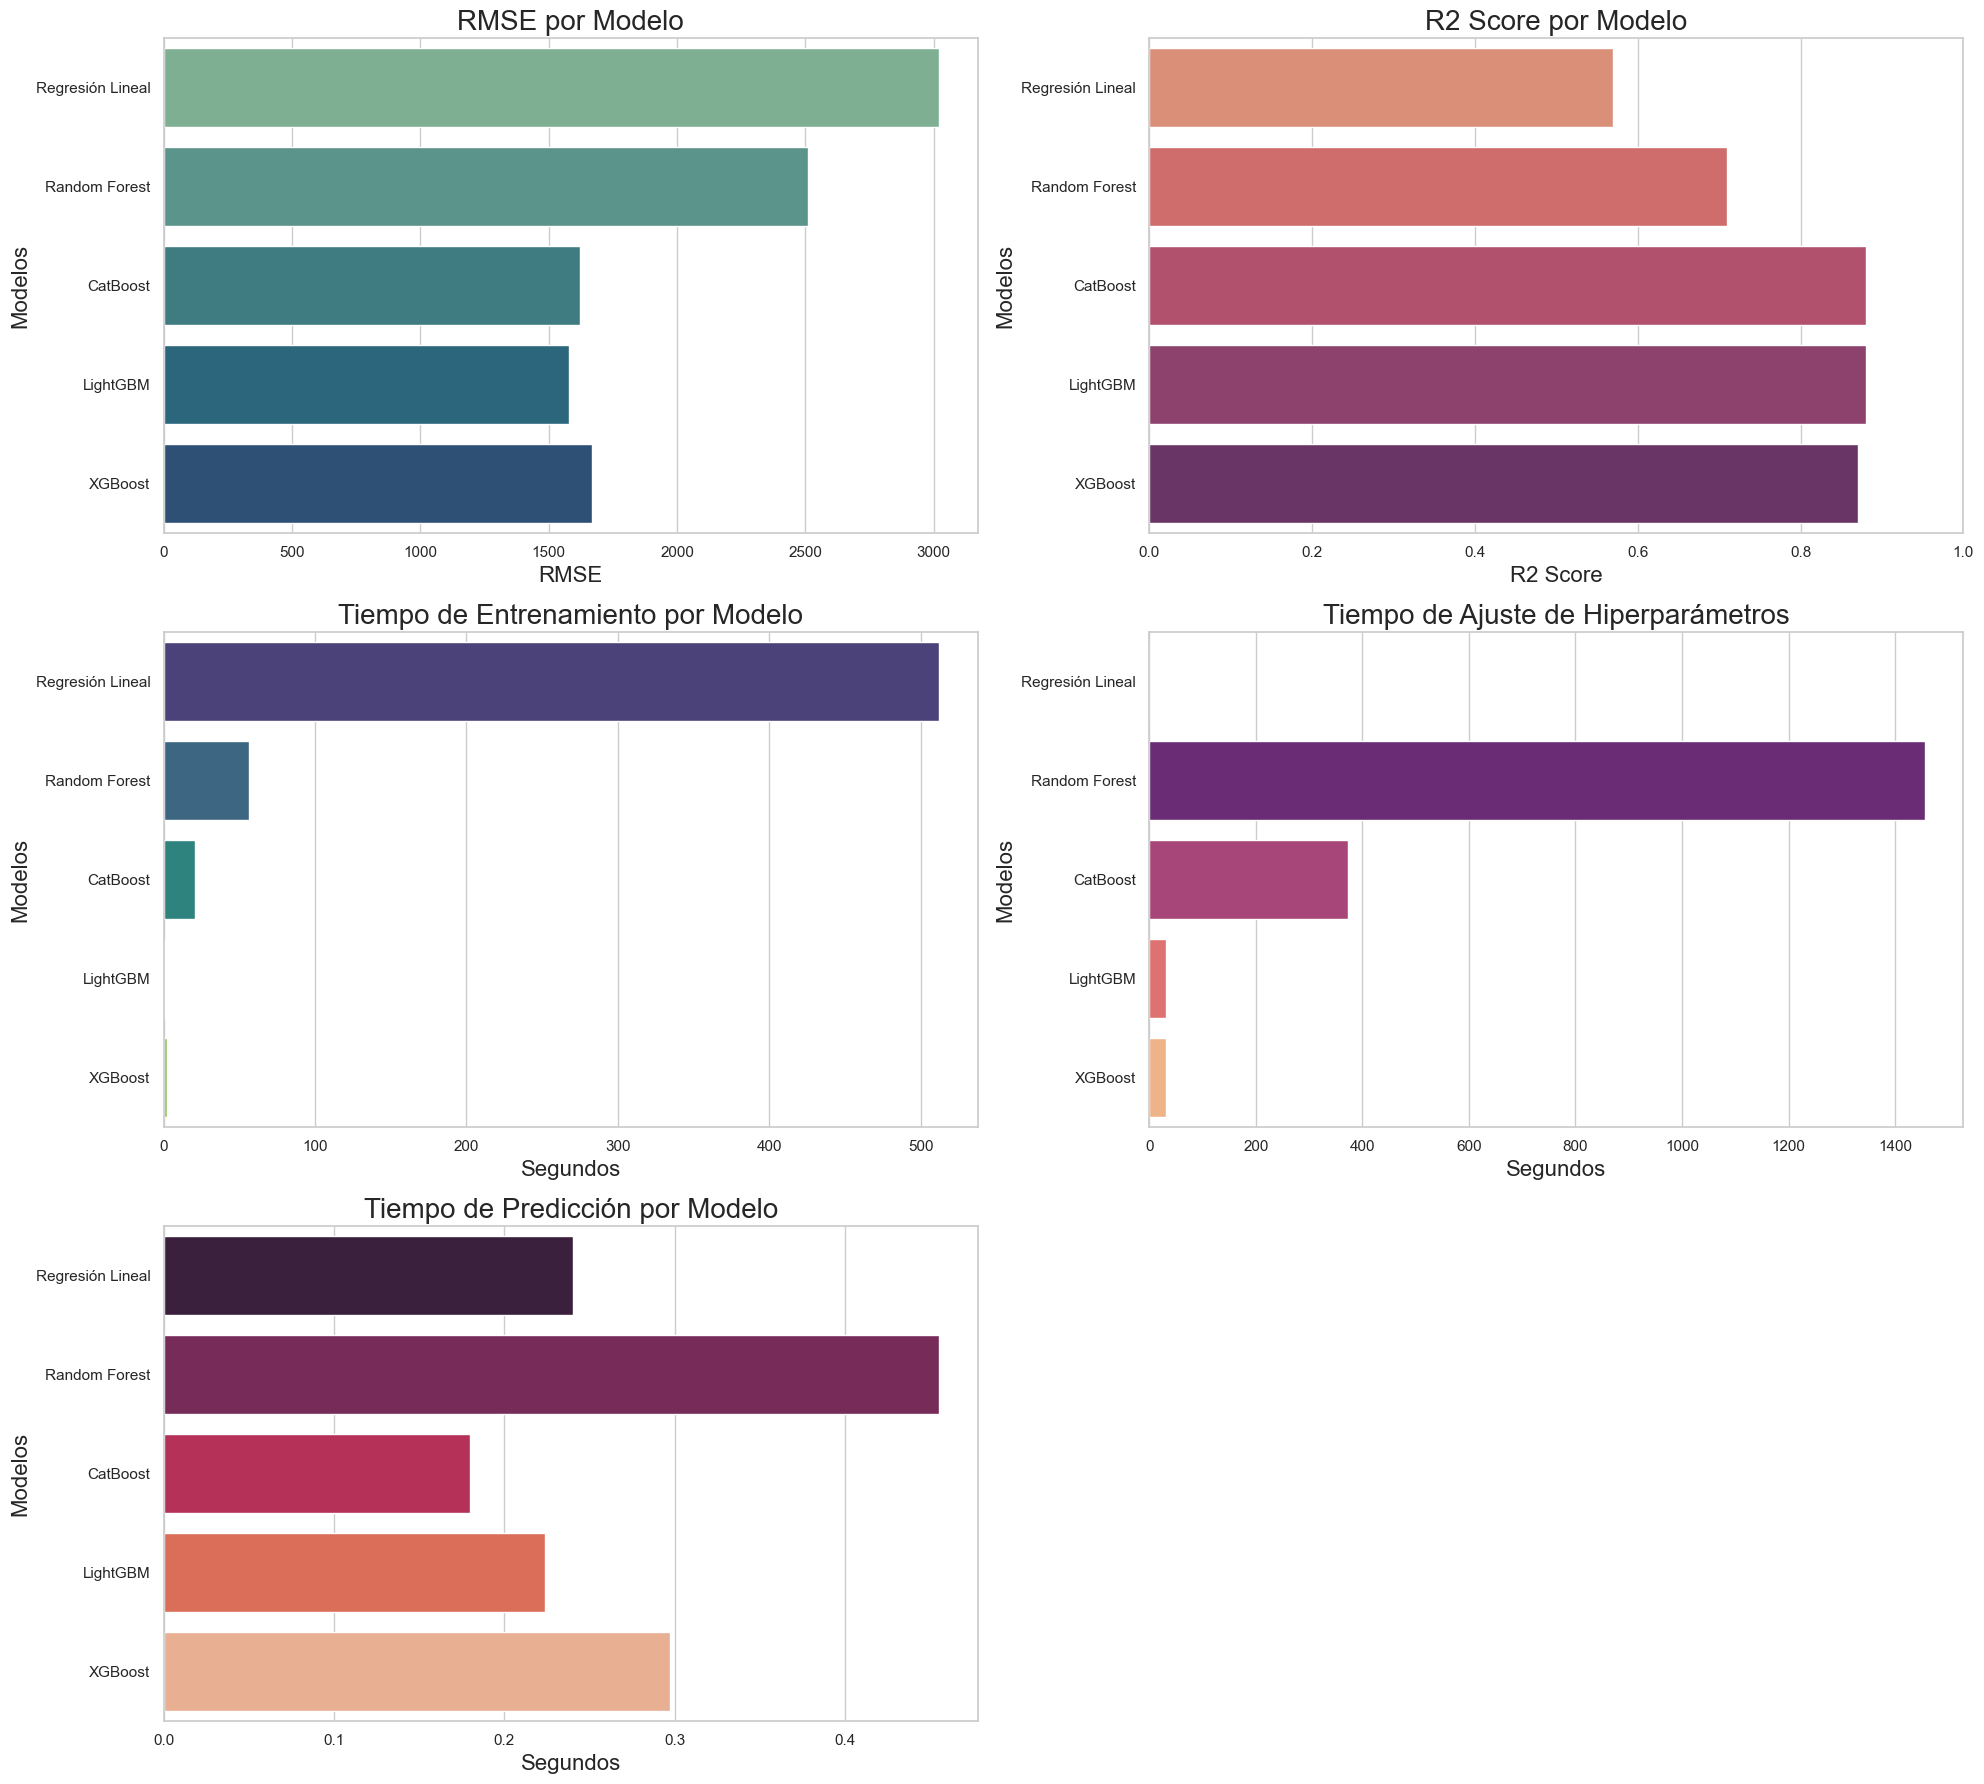

In [99]:
# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(20, 18))

# Subplot 1: RMSE
plt.subplot(3, 2, 1)
sns.barplot(x='rmse', y='modelo', data=models_results, palette='crest')
plt.title('RMSE por Modelo', fontsize=20)
plt.xlabel('RMSE', fontsize=16)
plt.ylabel('Modelos', fontsize=16)

# Subplot 2: R2 Score
plt.subplot(3, 2, 2)
sns.barplot(x='r2_score', y='modelo', data=models_results, palette='flare')
plt.title('R2 Score por Modelo', fontsize=20)
plt.xlabel('R2 Score', fontsize=16)
plt.xlim(0, 1)
plt.ylabel('Modelos', fontsize=16)

# Subplot 3: Tiempo de Entrenamiento
plt.subplot(3, 2, 3)
sns.barplot(x='tiempo_de_entrenamiento', y='modelo', data=models_results, palette='viridis')
plt.title('Tiempo de Entrenamiento por Modelo', fontsize=20)
plt.xlabel('Segundos', fontsize=16)
plt.ylabel('Modelos', fontsize=16)

# Subplot 4: Tiempo de Ajuste de Hiperparámetros
plt.subplot(3, 2, 4)
sns.barplot(x='tiempo_ajuste_hiperparametros', y='modelo', data=models_results, palette='magma')
plt.title('Tiempo de Ajuste de Hiperparámetros', fontsize=20)
plt.xlabel('Segundos', fontsize=16)
plt.ylabel('Modelos', fontsize=16)

# Subplot 5: Tiempo de Predicción
plt.subplot(3, 2, 5)
sns.barplot(x='tiempo_de_prediccion', y='modelo', data=models_results, palette='rocket')
plt.title('Tiempo de Predicción por Modelo', fontsize=20)
plt.xlabel('Segundos', fontsize=16)
plt.ylabel('Modelos', fontsize=16)

# Ajuste final del layout
plt.tight_layout()
plt.show()


In [ ]:
# Suponiendo que 'model' es tu modelo final entrenado (LightGBM, por ejemplo)
feature_importance = pd.DataFrame({
    'feature': lightgbm_model.feature_name_,
    'importance': lightgbm_model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Conclusiones

Como podemos observar en las conclusiones dichas en la evaluacion de los modelos y ante df comparativo vemos como LightGBM se posiciona como el modelo más balanceado en términos de precisión y eficiencia, debido que posee el RMSE mas bajo con 1579.49 y con un r2 score alto de 0.88, sin mencionar que tiene los menores tiempos de ajuste de hiperparametros, entrenamiento y predicción. Aunque CatBoost también es una excelente alternativa como segunda opcion, debido a que posee el mismo valor de r2 score que LightGBM pero tiene un ligero aumento de RMSE.

De igual forma tenemos las siguintes observaciones ante los demas modelos:

* XGBoost: Igual bastante competitivo, debido a que posee incluso tiempos de ajuste de parametros y entrenamiento menores a CatBoost, ligeramente por debajo de los anteriores ante las metricas de RMSE y R2 score.

* Random Forest: Mejora sobre la regresión lineal, pero con mayor tiempo de ajustes de hiperparametros, entrenamiento y prediccion, y se queda considerablemente atras ante los demas modelos.

* Regresión Lineal: Se utilizo como modelo base o prueba de cordura.

[Volver a Contenidos](#back)

# Conclusión general <a id='end'></a>

Tras haber realizado y completado cada uno de los pasos de este proyecto se tuvo como objetivo desarrollar un modelo predictivo robusto que estime el precio de vehículos con base en sus características. A lo largo del proceso, se aplicaron técnicas clave como de preprocesamiento, escalado, codificación y se probaron diversos modelos de regresión con ajustes de hiperparámetros mediante GridSearchCV.

Como hallazgos tenemos que:

* Se entrenaron y compararon cinco modelos distintos: Regresión Lineal, Random Forest, CatBoost, LightGBM y XGBoost. Cada uno fue ajustado utilizando GridSearchCV para encontrar su configuración óptima de hiperparámetros.

* Como resultado tenemos que los modelos de boosting CatBoost, LightGBM y XGBoost superaron significativamente a la regresión lineal y al Random Forest en precisión.

* LightGBM se destacó como el modelo más eficiente en términos de precisión con un RMSE de 1579.49 y un R2 de 0.88 y velocidad de ajustes de hiperparámetros, entrenamiento y predicción.

Finalmente la realización fue bastante satisfactoria y se logró demostrar cómo el uso combinado de técnicas, ingeniería de características y modelos puede ofrecer soluciones eficaces y escalables ante este tipo de problematicas.

[Volver a Contenidos](#back)

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en orden de ejecución
- [x]  Los datos han sido descargados y preparados
- [x]  Los modelos han sido entrenados
- [x]  Se realizó el análisis de velocidad y calidad de los modelos